# EM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## a)

In [2]:
def generate_sample(n):
    x = np.zeros(n)
    ind = np.random.choice([0, 1], n, p=[0.3, 0.7])
    x[ind == 0] = np.random.normal(1, 1, np.sum(ind == 0))
    x[ind == 1] = np.random.normal(5, 2, np.sum(ind == 1))
    return x

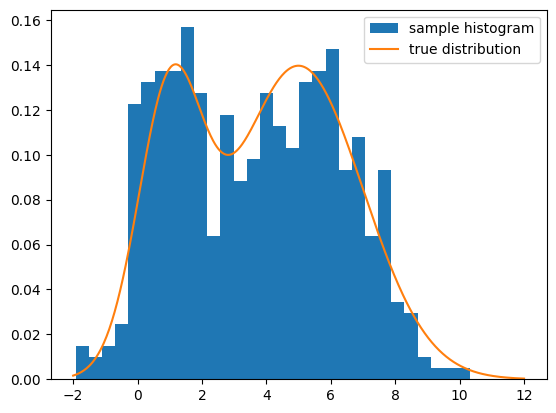

In [3]:
x = np.linspace(-2, 12, 500)

y_sample = generate_sample(500)
y_true = 0.3 * np.exp(-(x - 1)**2 / 2) / np.sqrt(2 * np.pi) + 0.7 * np.exp(-(x - 5)**2 / (2 * 2**2)) / np.sqrt(2 * np.pi * 2**2)

plt.hist(y_sample, bins=30, density=True, label='sample histogram')
plt.plot(x, y_true, label='true distribution')
plt.legend()
plt.show()

## b - e)

In [4]:
def E_step(y, pi, mu_1, mu_2, sigma_1, sigma_2):
    gamma = np.zeros(len(y))
    for i in range(len(y)):
        gamma[i] = pi * np.exp(-(y[i] - mu_1)**2 / (2 * sigma_1**2)) / (np.sqrt(2 * np.pi) * sigma_1) / \
                   ((1 - pi) * np.exp(-(y[i] - mu_2)**2 / (2 * sigma_2**2)) / (np.sqrt(2 * np.pi) * sigma_2) + \
                    pi * np.exp(-(y[i] - mu_1)**2 / (2 * sigma_1**2)) / (np.sqrt(2 * np.pi) * sigma_1))
    return gamma

In [5]:
def M_step(y, mu_1, mu_2, gamma):
    pi = np.sum(gamma) / len(y)
    mu_1 = np.sum(gamma * y) / (np.sum(gamma))
    mu_2 = np.sum((1 - gamma) * y) / (np.sum(1 - gamma))
    sigma_1 = np.sqrt(np.sum(gamma * (y - mu_1)**2) / np.sum(gamma))
    sigma_2 = np.sqrt(np.sum((1 - gamma) * (y - mu_2)**2) / np.sum(1 - gamma))
    return pi, mu_1, mu_2, sigma_1, sigma_2

In [6]:
y_sample = generate_sample(500)

pi = 0.5
mu_1 = np.random.uniform(0, 1)
mu_2 = np.random.uniform(0, 1)
sigma_1 = np.random.uniform(0, 1)
sigma_2 = np.random.uniform(0, 1)

In [7]:
for i in range(500):
    gamma = E_step(y_sample, pi, mu_1, mu_2, sigma_1, sigma_2)
    pi, mu_1, mu_2, sigma_1, sigma_2 = M_step(y_sample, mu_1, mu_2, gamma)

In [8]:
print(f'pi: {pi:.2f}, mu_1: {mu_1:.2f}, sigma_1: {sigma_1:.2f}, mu_2: {mu_2:.2f}, sigma_2: {sigma_2:.2f}')

pi: 0.27, mu_1: 0.95, sigma_1: 0.78, mu_2: 4.94, sigma_2: 2.04


## f)

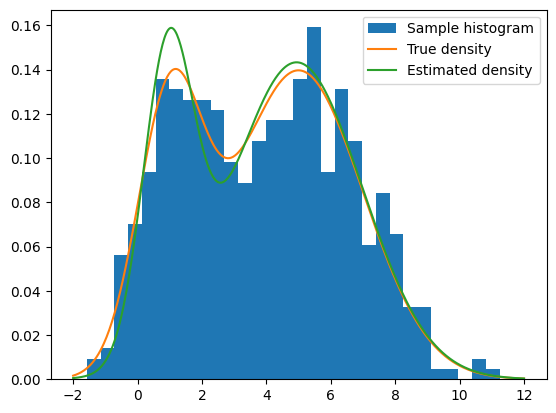

In [9]:
x = np.linspace(-2, 12, 500)

y_sample = generate_sample(500)
y_true = 0.3 * np.exp(-(x - 1)**2 / 2) / np.sqrt(2 * np.pi) + 0.7 * np.exp(-(x - 5)**2 / (2 * 2**2)) / np.sqrt(2 * np.pi * 2**2)
y_estimated = pi * np.exp(-(x - mu_1)**2 / (2 * sigma_1**2)) / (np.sqrt(2 * np.pi) * sigma_1) + \
               (1 - pi) * np.exp(-(x - mu_2)**2 / (2 * sigma_2**2)) / (np.sqrt(2 * np.pi) * sigma_2)

plt.hist(y_sample, bins=30, density=True, label='Sample histogram')
plt.plot(x, y_true, label='True density')
plt.plot(x, y_estimated, label='Estimated density')
plt.legend()
plt.show()